In [19]:
import json
import os

with open('data/arc-agi_training_challenges.json') as f:
    challenges = json.load(f)

with open('data/arc-agi_training_solutions.json') as f:
    solutions = json.load(f)

In [20]:
challenges.keys()

dict_keys(['007bbfb7', '00d62c1b', '017c7c7b', '025d127b', '045e512c', '0520fde7', '05269061', '05f2a901', '06df4c85', '08ed6ac7', '09629e4f', '0962bcdd', '0a938d79', '0b148d64', '0ca9ddb6', '0d3d703e', '0dfd9992', '0e206a2e', '10fcaaa3', '11852cab', '1190e5a7', '137eaa0f', '150deff5', '178fcbfb', '1a07d186', '1b2d62fb', '1b60fb0c', '1bfc4729', '1c786137', '1caeab9d', '1cf80156', '1e0a9b12', '1e32b0e9', '1f0c79e5', '1f642eb9', '1f85a75f', '1f876c06', '1fad071e', '2013d3e2', '2204b7a8', '22168020', '22233c11', '2281f1f4', '228f6490', '22eb0ac0', '234bbc79', '23581191', '239be575', '23b5c85d', '253bf280', '25d487eb', '25d8a9c8', '25ff71a9', '264363fd', '272f95fa', '27a28665', '28bf18c6', '28e73c20', '29623171', '29c11459', '29ec7d0e', '2bcee788', '2bee17df', '2c608aff', '2dc579da', '2dd70a9a', '2dee498d', '31aa019c', '321b1fc6', '32597951', '3345333e', '3428a4f5', '3618c87e', '3631a71a', '363442ee', '36d67576', '36fdfd69', '3906de3d', '39a8645d', '39e1d7f9', '3aa6fb7a', '3ac3eb23', '3af2

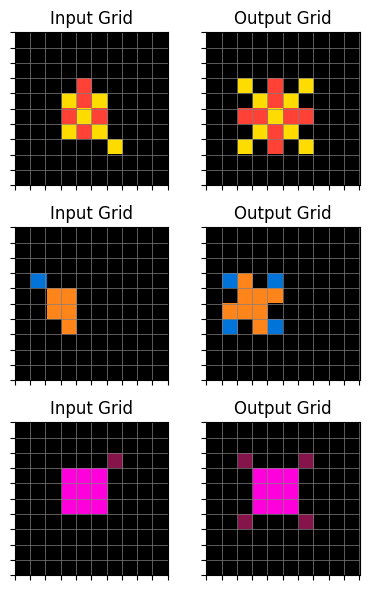

In [30]:
from matplotlib import pyplot as plt
import preprocessing
import numpy as np

example_id = "e40b9e2f"

# Function to visualize grid with color scheme
def visualize_grids_with_colors(grids: list[dict[str, list[list[int]]]]):
    n_grids = len(grids)
    fig, axes = plt.subplots(n_grids, 2, figsize=(4, n_grids * 2))
    
    if n_grids == 1:
        axes = [axes]
    
    for i, grid in enumerate(grids):
        input_grid = np.array(grid['input'])
        output_grid = np.array(grid['output'])
        
        # Replace input and output grids with color values
        input_grid_colored = preprocessing.replace_with_colors(input_grid)
        output_grid_colored = preprocessing.replace_with_colors(output_grid)
        
        # Plot input grid
        axes[i][0].imshow(input_grid_colored, interpolation='nearest')
        axes[i][0].set_title('Input Grid')
        axes[i][0].axis('on')
        axes[i][0].grid(True, which='both', color='gray', linestyle='-', linewidth=0.5)
        axes[i][0].set_xticks(np.arange(-0.55, input_grid.shape[1], 1))
        axes[i][0].set_yticks(np.arange(-0.5, input_grid.shape[0], 1))
        axes[i][0].set_xticklabels([])
        axes[i][0].set_yticklabels([])
        
        # Plot output grid
        axes[i][1].imshow(output_grid_colored, interpolation='nearest')
        axes[i][1].set_title('Output Grid')
        axes[i][1].axis('on')
        axes[i][1].grid(True, which='both', color='gray', linestyle='-', linewidth=0.5)
        axes[i][1].set_xticks(np.arange(-0.55, output_grid.shape[1], 1))
        axes[i][1].set_yticks(np.arange(-0.5, output_grid.shape[0], 1))
        axes[i][1].set_xticklabels([])
        axes[i][1].set_yticklabels([])
    
    plt.tight_layout()
    plt.show()

# Example usage with colored grids
visualize_grids_with_colors(challenges[example_id]['train'])

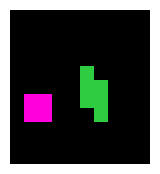

In [29]:
grid = np.array(challenges[example_id]['test'][0]['input'])
colored_grid = preprocessing.replace_with_colors(grid)
# Visualize the grid
plt.figure(figsize=(2, 2))
plt.imshow(colored_grid)
plt.axis('off')
plt.show()

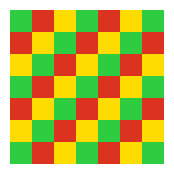

In [23]:
grid = np.array(solutions[example_id][0])
colored_grid = preprocessing.replace_with_colors(grid)
# Visualize the grid
plt.figure(figsize=(2, 2))
plt.imshow(colored_grid)
plt.axis('off')
plt.show()

In [24]:
print(preprocessing.grid_to_ascii(grid))

   A B C D E F G
A |2|1|4|2|1|4|2|
B |1|4|2|1|4|2|1|
C |4|2|1|4|2|1|4|
D |2|1|4|2|1|4|2|
E |1|4|2|1|4|2|1|
F |4|2|1|4|2|1|4|
G |2|1|4|2|1|4|2|



In [25]:
grid

array([[2, 1, 4, 2, 1, 4, 2],
       [1, 4, 2, 1, 4, 2, 1],
       [4, 2, 1, 4, 2, 1, 4],
       [2, 1, 4, 2, 1, 4, 2],
       [1, 4, 2, 1, 4, 2, 1],
       [4, 2, 1, 4, 2, 1, 4],
       [2, 1, 4, 2, 1, 4, 2]])

In [26]:
ascii_grid = preprocessing.grid_to_ascii(grid)
preprocessing.parse_ascii_grid(ascii_grid)

array([[2, 1, 4, 2, 1, 4, 2],
       [1, 4, 2, 1, 4, 2, 1],
       [4, 2, 1, 4, 2, 1, 4],
       [2, 1, 4, 2, 1, 4, 2],
       [1, 4, 2, 1, 4, 2, 1],
       [4, 2, 1, 4, 2, 1, 4],
       [2, 1, 4, 2, 1, 4, 2]])

In [27]:
shapes = preprocessing.find_contiguous_shapes(grid)
for shape in shapes:
    print(preprocessing.grid_to_ascii(shape))

   A B C D E F G
A |2|1|4|2|1|4|2|
B |1|4|2|1|4|2|1|
C |4|2|1|4|2|1|4|
D |2|1|4|2|1|4|2|
E |1|4|2|1|4|2|1|
F |4|2|1|4|2|1|4|
G |2|1|4|2|1|4|2|

